# Assignment 3: Exploratory Analysis and Data Cleaning
Choosen Dataset:
[Data Science Job Posting on Glassdoor](https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor)

Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian



**About Dataset:**
Dataset is a csv file that contains information about job offers for the position of a Data Scientist from the Glassdoor website.

**Import Libraries**

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

**Reading Dataset**

In [71]:
path = 'Cleaned_DS_Jobs.csv'
df = pd.read_csv(path)


**First we take a look to our data**

In [72]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


***Pie Chart***

Pie charts are great tools to show us the composition of data. If done right, we get a nice picture of contributing factors to our data source in a glance.

**We replace '-1' values with Unknown**

In [73]:
df = df.replace('-1','Unknown')

Then group by data and categorized ```Size``` column for create a Pie Chart

In [74]:
size_data = df.groupby('Size').size()
size_data.index

Index(['1 to 50 employees', '10000+ employees', '1001 to 5000 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', 'Unknown'],
      dtype='object', name='Size')

A pie chart based on Classification of companies 

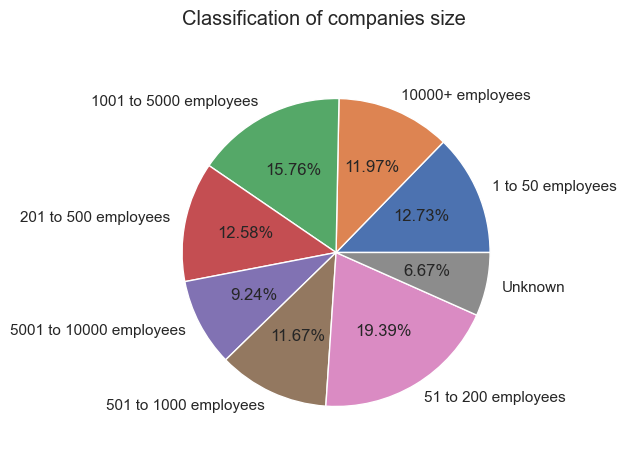

In [75]:
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(size_data,labels=size_data.index, autopct='%.2f%%')
fig.suptitle("Classification of companies size");

In [76]:
job_simp_data = df.groupby('job_simp').size()
job_simp_data

job_simp
analyst            55
data engineer      46
data scientist    447
director            3
manager             7
mle                34
na                 68
dtype: int64

We replace na values with Unknown

In [77]:
df['job_simp'] = df['job_simp'].replace('na','Unknown')
job_simp_data = df.groupby('job_simp').size()
job_simp_data

job_simp
Unknown            68
analyst            55
data engineer      46
data scientist    447
director            3
manager             7
mle                34
dtype: int64

A pie chart based on Classification of job titles 

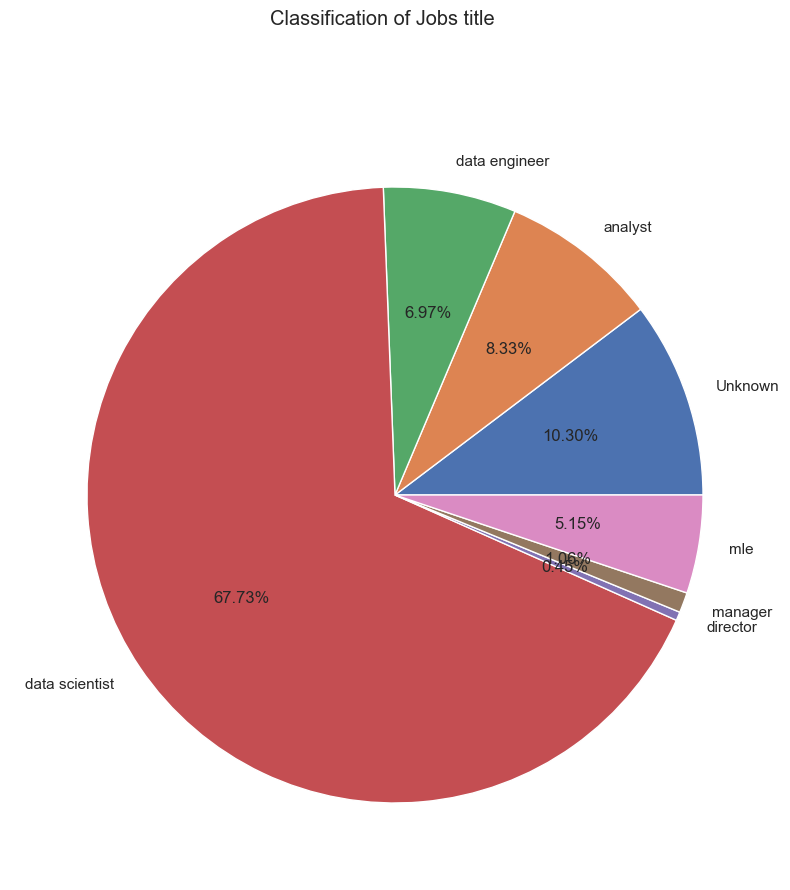

In [78]:
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(job_simp_data,labels=job_simp_data.index, autopct='%.2f%%')
fig.suptitle("Classification of Jobs title");

***Box Plots***

Box plots are another way of showing the distribution of a single variable.

The box extends from the 1st to 3rd quantiles of the data and the line in the middle corresponds to the median (Q2). The "whiskers" extend out of the box to no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval.

*Outliers are plotted as separate dots.*

A boxplot , Based on ```company_age```

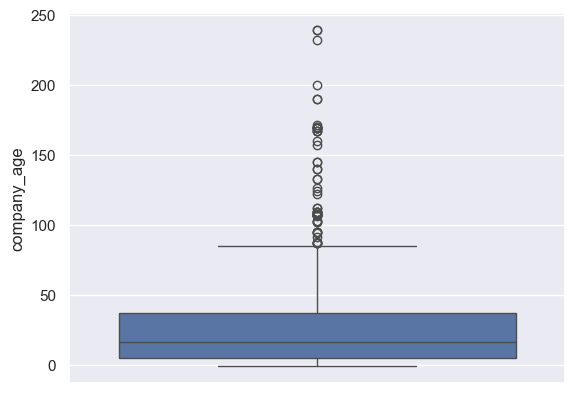

In [79]:
sns.boxplot(df["company_age"], legend=True);

Select indicators and show boxplot using IQR

<Axes: ylabel='company_age'>

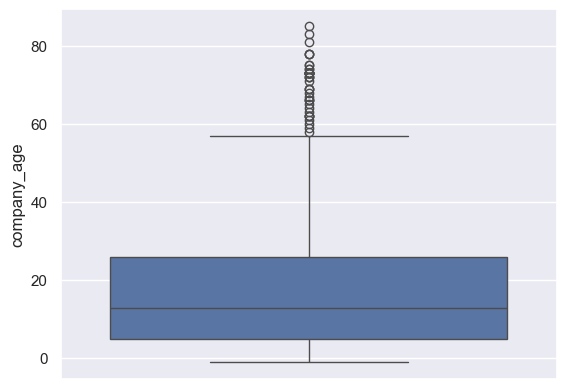

In [80]:
data = df['company_age']

#Calculate Q1 and Q3 and IQR , then draw a boxplot that show outlier data
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#remove the outliers
data.drop(data[(data.values < Q1-1.5*IQR) | (data.values > Q3+1.5*IQR)].index , inplace = True)
sns.boxplot(data, legend=True)

***Line Chart and Stacked Line Chart***

Line and bar charts are excellent to show us trend and how they compare to each other

A line chart , Based on ```company_age```

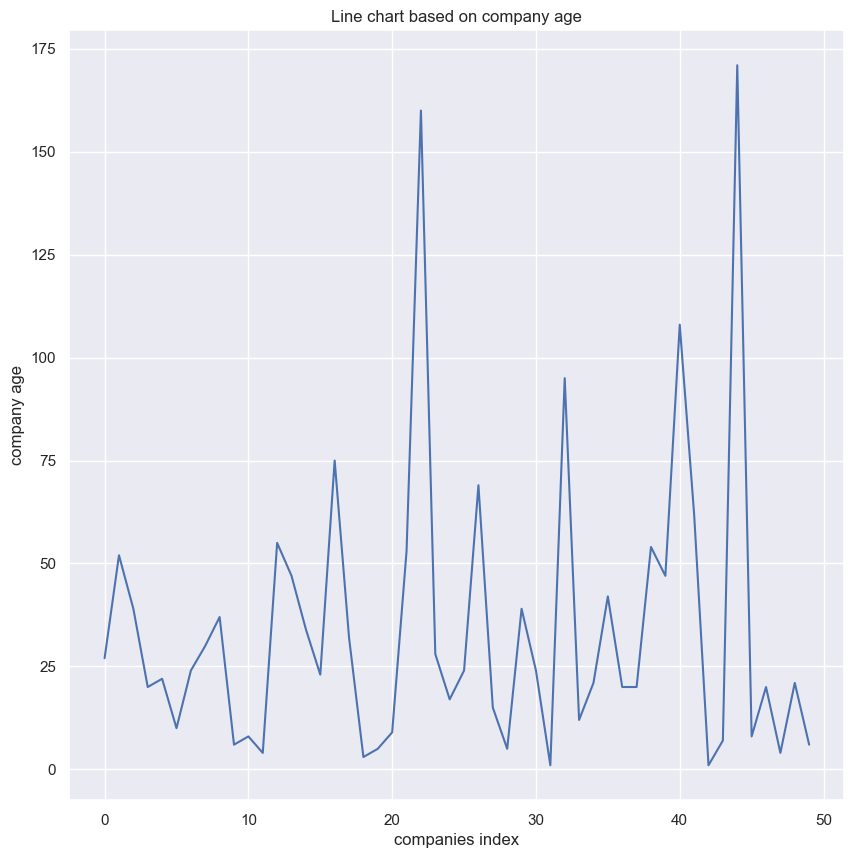

In [81]:
fig, ax = plt.subplots(figsize = (10,10))
data = df.head(50)['company_age']
ax.plot(data)
ax.set_title('Line chart based on company age')
ax.set_xlabel('companies index')
ax.set_ylabel('company age');

A stack line chart , Based on three ```Industry``` name and ```Rating``` of these

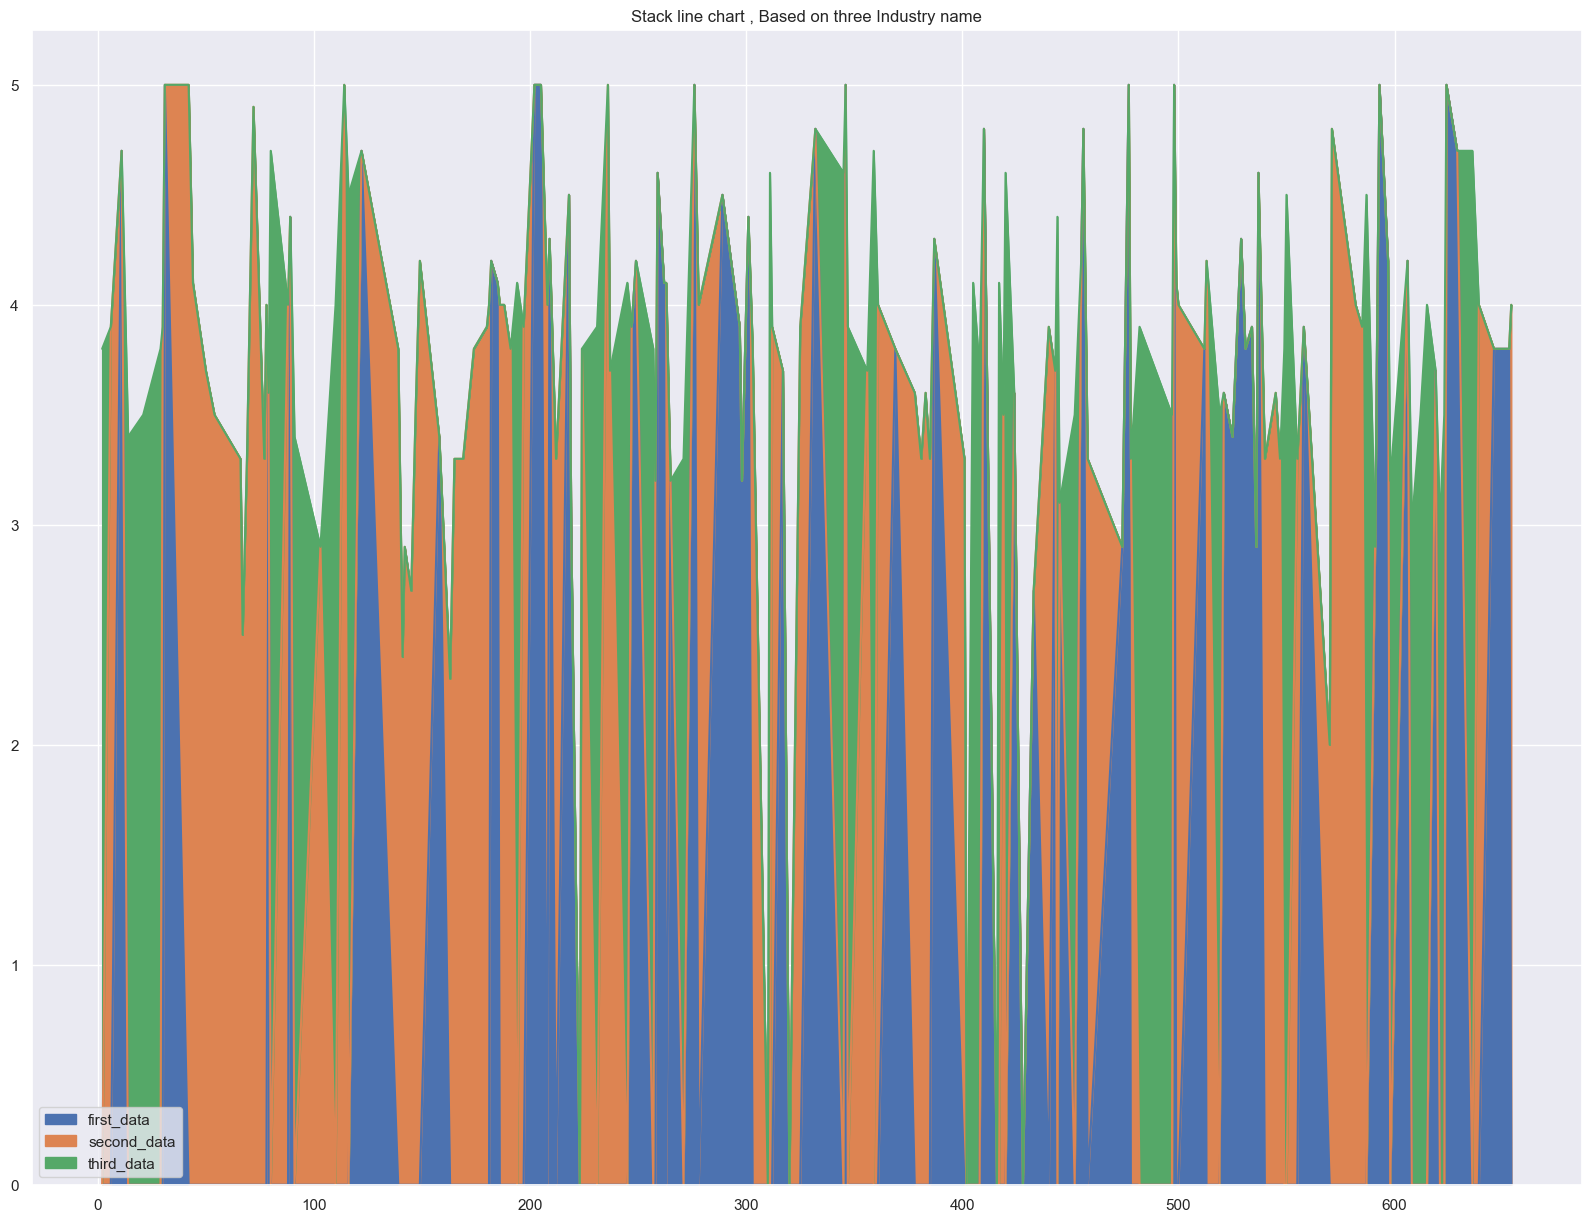

In [82]:
#filter data by Industry
first_data = df[df['Industry'] == 'IT Services']['Rating']
second_data = df[df['Industry'] == 'Biotech & Pharmaceuticals']['Rating']
third_data = df[df['Industry'] == 'Consulting']['Rating']

#print(first_data.shape, second_data.shape, third_data.shape)
#create a dataframe plot
test = pd.DataFrame({
    'first_data': first_data,
    'second_data': second_data,
    'third_data': third_data,
})
ax = test.plot.area(figsize=[20,15])
ax.set_title('Stack line chart , Based on three Industry name');

***Bar charts and Multi bar charts and Stacked bar charts***

bar charts are excellent to show us trend and how they compare to each other.

A bar chart based on the sector and the number of its companies

C:\Users\Active\AppData\Local\Temp\ipykernel_19900\375518206.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



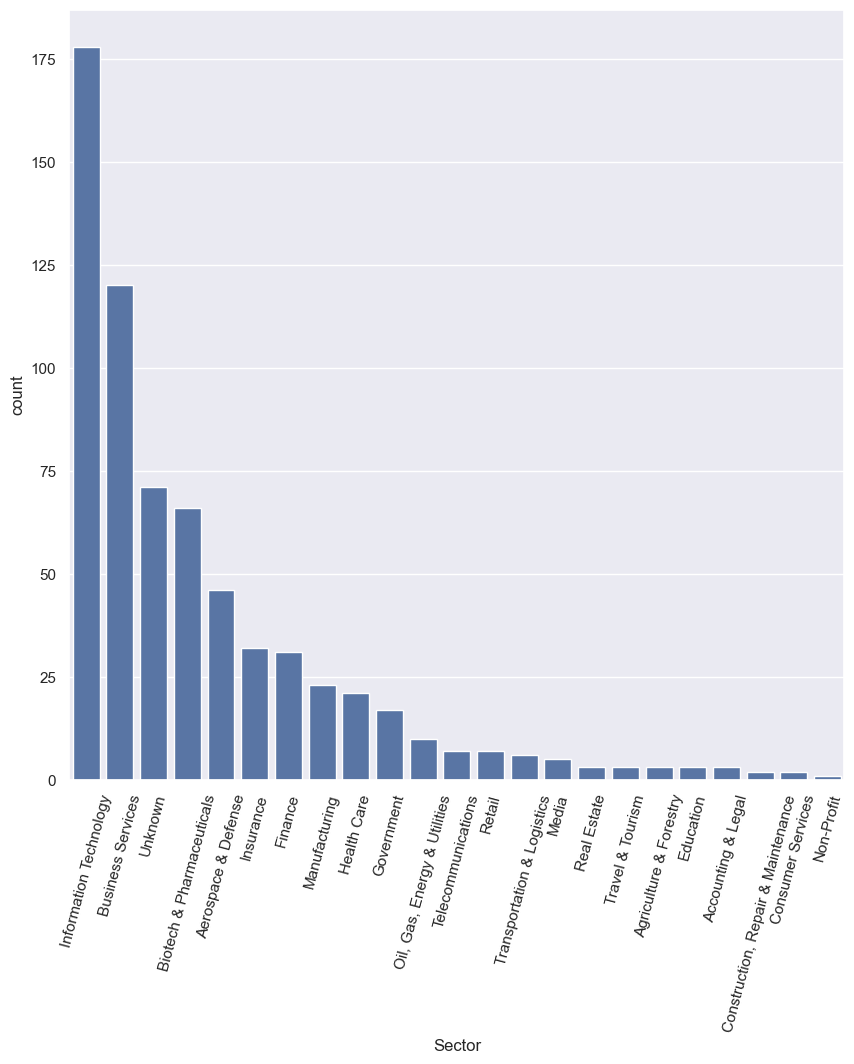

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
#select our index and columns for plot
indexes = df['Sector'].value_counts().index
columns = df['Sector'].value_counts()
#draw plot
chart = sns.barplot(x=indexes, y=columns)
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=75)

A bar chart based on the job_simp and the number of data

C:\Users\Active\AppData\Local\Temp\ipykernel_19900\4143812856.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



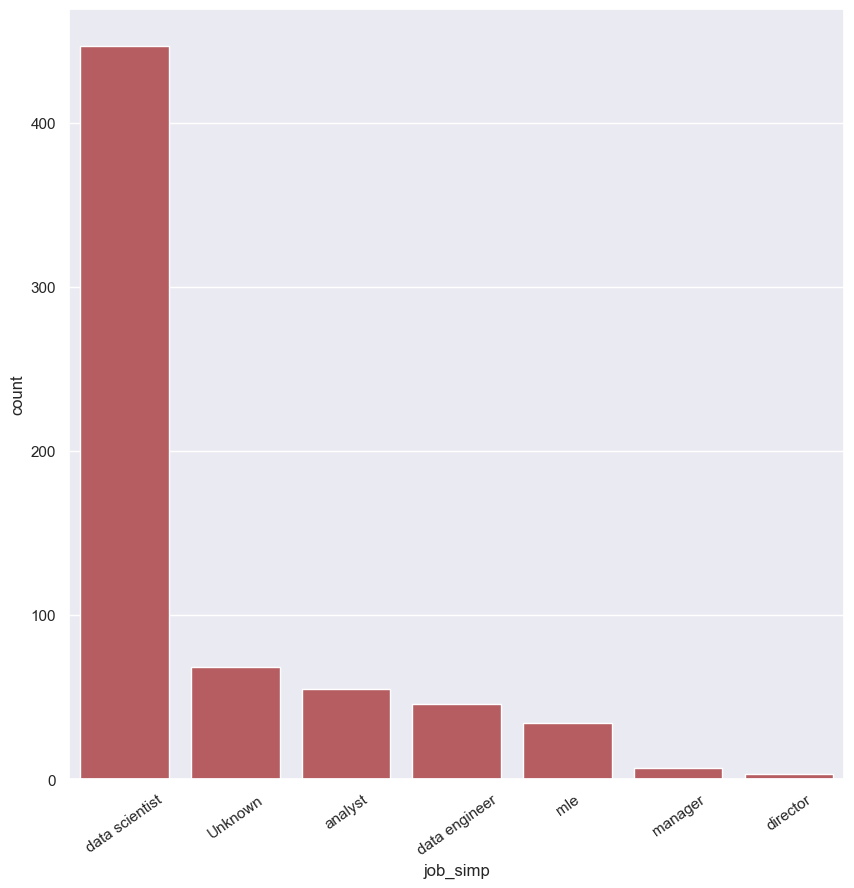

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
indexes = df['job_simp'].value_counts().index
columns = df['job_simp'].value_counts()
chart = sns.barplot(x=indexes, y=columns, color='r')
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=35)

Stacked bar chart from two 20 sample data from our dataset

then plot it in range 20

(21,) (21,)


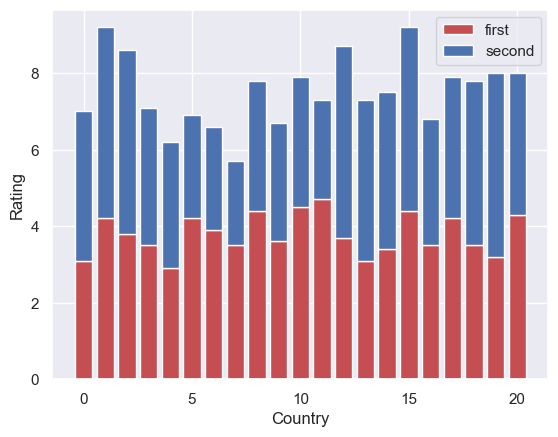

In [85]:
first = df.loc[0:20]['Rating']
second = df.loc[30:50]['Rating']
ls = range(21)
print(first.shape, second.shape)
# plot bars in stack manner
plt.bar(ls, first, color='r')
plt.bar(ls, second, bottom=first, color='b')
plt.legend(['first','second'])
plt.ylabel('Rating')
plt.xlabel('Country')
plt.show()

Multi bar chart based on Rating and Industry of companies - from 20 sample data

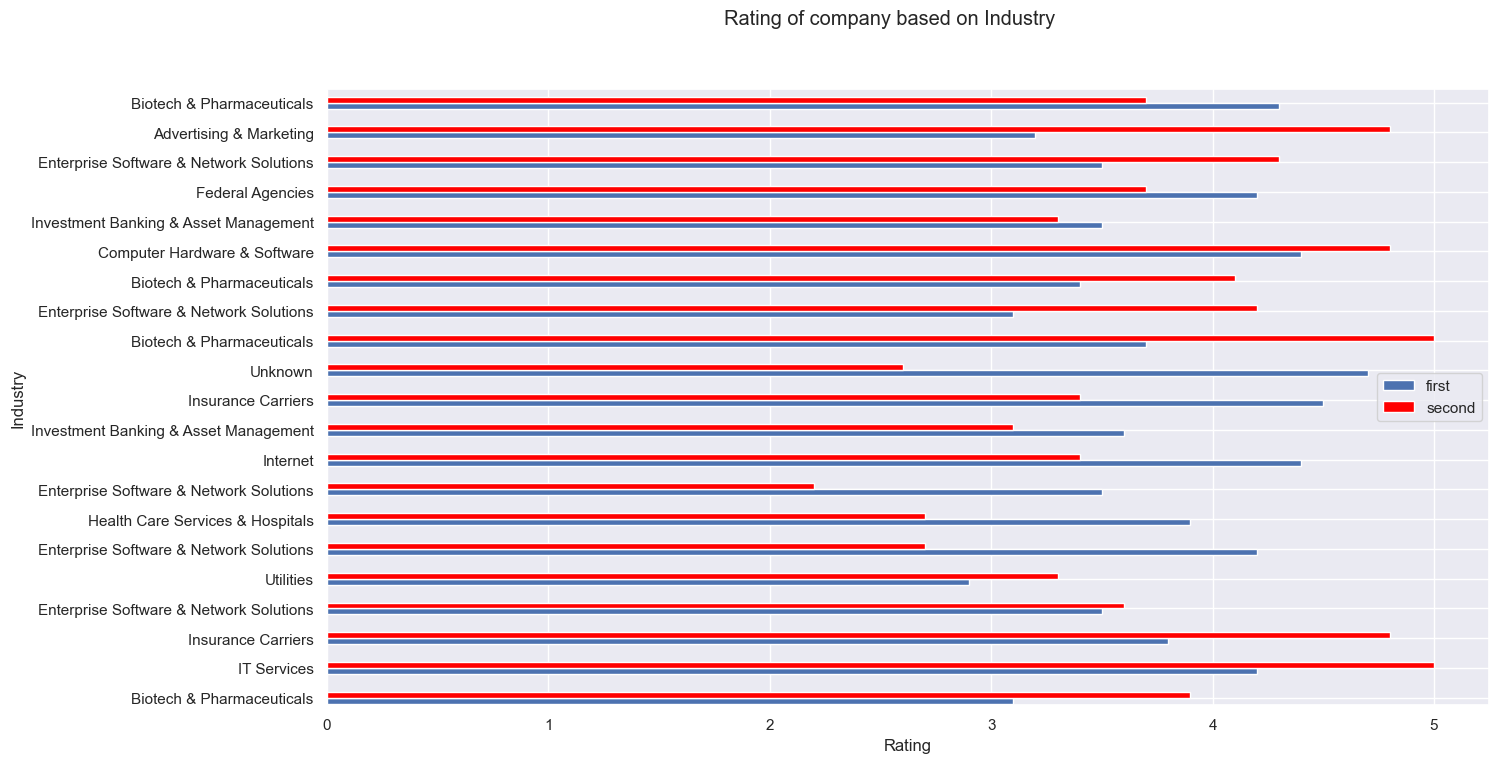

In [86]:
first = df.loc[0:20]
second = df.loc[30:50]

# plot bars in stack manner
ax = first.plot.barh(x='Industry',y='Rating', position=1,width=.2,figsize=(15,8))
second.plot.barh(x='Industry',y='Rating', ax=ax,color='red',position=0,width=.2)
plt.suptitle('Rating of company based on Industry')
plt.legend(['first','second'])
plt.ylabel('Industry')
plt.xlabel('Rating')
plt.show()


***Bubble Charts***

Bubble charts are a clever way of illustrating 3 dimensional results onto a 2 dimensional plot

A scatter plot based on avg_salary and company_age

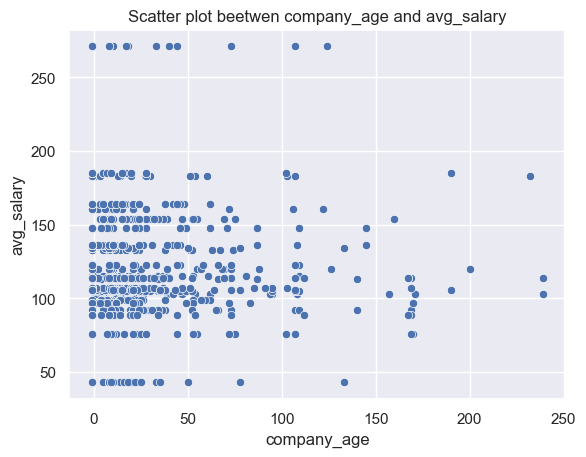

In [87]:
#use seaborn for scatter plot
sns.scatterplot(x='company_age',y='avg_salary',data=df).set_title("Scatter plot beetwen company_age and avg_salary");

***Interactive charts using Plotly***

This part not showed in github so I attach result's picture at the end of notebook

A geo chart based on maximum salary in USA 

In [88]:
import plotly.express as px

fig = px.choropleth(locations= ['AZ','NJ','NY','CO','IL','NC','VA','SC','WA','PA','DE','TX','KS','FL','IN','OH','GA','UT'], 
                    locationmode="USA-states", 
                    color=[94.494845, 90.232558, 89.026087, 89.022727, 88.829268,85.233333, 85.125000, 83.000000, 82.759259, 77.824561, 75.909091, 74.116751, 67.000000, 66.666667, 61.000000, 58.800000, 56.000000, 48.454545],
                    labels={'color':'Maximum Salary', 'locations':'State'},
                    scope="usa") 


fig.update_layout(
    
    title_text = 'Top 20 States with Maximum Salary',
    geo_scope='usa'
)
fig.show()

![saved_file_pic](newplot.png)

A interactive chart based on ```Type of ownership``` column

In [89]:
data = pd.DataFrame(df['Type of ownership'].value_counts())
data

import plotly.express as px
fig = px.pie(data, values=data['count'], names=data.index)
fig.update_layout(title = 'Type of ownership')
fig.show()

![saved_file_pic](newplot2.png)

***Illustrate Uncertainty in the Data***

Data visualizations affects our decision making. A graph without omitting the uncertanity in the results could be misleading:

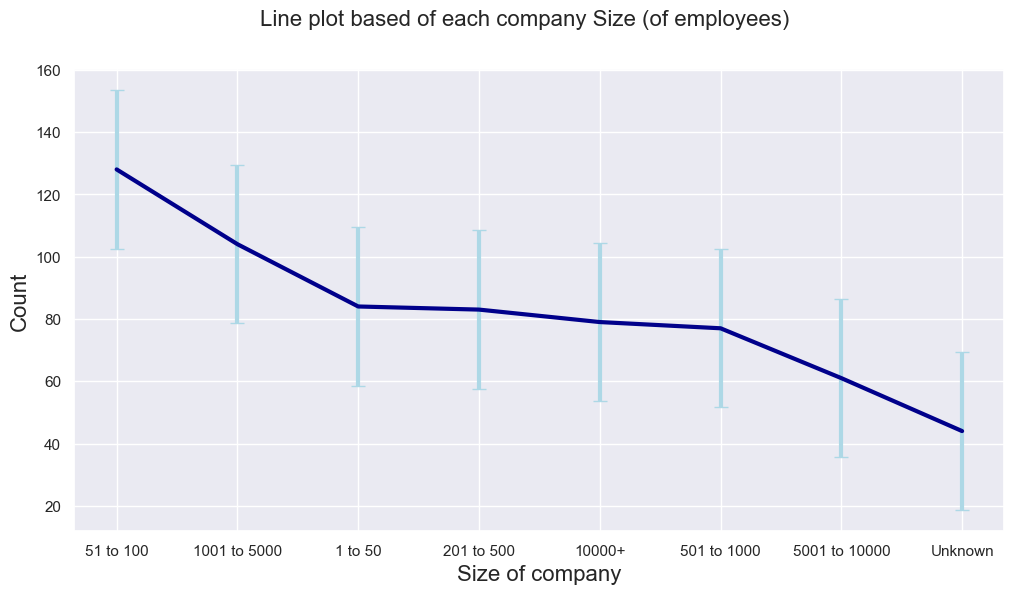

In [90]:
data = df['Size'].value_counts()
data.index = ['51 to 100','1001 to 5000','1 to 50','201 to 500','10000+','501 to 1000','5001 to 10000','Unknown']
err = data.std()
data.plot.line(color='DarkBlue',figsize=(12,6),legend=[],linewidth=3,grid=True,yerr=err,capsize=5,ecolor='LightBlue')

# Now let's setup the labels, titles and format y axis as percentages
plt.suptitle('Line plot based of each company Size (of employees)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xlabel('Size of company',fontsize=16)
plt.show()